In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
X_train = pd.read_csv("X_train_views.csv")
X_test = pd.read_csv("X_test_views.csv")
y_train = pd.read_csv("y_train_views.csv").squeeze()
y_test = pd.read_csv("y_test_views.csv").squeeze()

In [3]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [4]:
y_pred_log = lr_model.predict(X_test)

In [30]:
print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred_log)))
print('r2 (test): ' + str(r2_score(y_test, y_pred_log)))

RMSE (test): 1.4306225167750448
r2 (test): 0.19453093508280828


In [31]:
print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred_log)))

MAPE (test): 0.07576931181348713


In [32]:
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)


In [33]:
print(y_test_actual.head(10))

0     281520.0
1     415293.0
2     153785.0
3     223167.0
4      49777.0
5    1265971.0
6     527913.0
7     171069.0
8     329397.0
9     210747.0
Name: views, dtype: float64


In [34]:
print(np.round(y_pred_actual[:10], 1))

[487865.7 217041.7 258998.7 233214.5 283333.1 432724.7 768315.5 238471.
 168427.7 115862.8]


In [35]:


print('RMSE (asli): ' + str(mean_squared_error(y_test_actual, y_pred_actual)))
print('r2 (asli): ' + str(r2_score(y_test_actual, y_pred_actual)))

RMSE (asli): 9558730766775.146
r2 (asli): -0.0034031502640745614


In [25]:
#hitung MAPE actual
mape_actual = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100
print(f"RMSE Actual: {rmse_actual:.2f}")

RMSE Actual: 3091719.71


In [21]:
print("=== Evaluation in Log1p Scale ===")
print("RMSE (log):", rmse_log)
print("R2 Score (log):", r2_log)

print("\n=== Evaluation in Original Scale ===")
print("RMSE (original):", rmse_actual)
print("R2 Score (original):", r2_actual)

=== Evaluation in Log1p Scale ===
RMSE (log): 1.1960863333284286
R2 Score (log): 0.19453093508280828

=== Evaluation in Original Scale ===
RMSE (original): 3091719.7102543344
R2 Score (original): -0.0034031502640745614


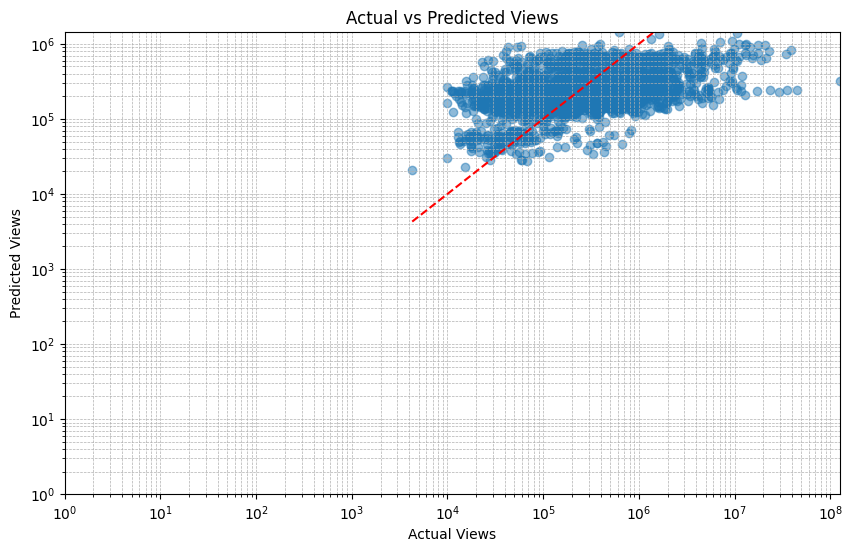

In [23]:
# plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 
         color='red', linestyle='--')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, y_test_actual.max())
plt.ylim(1, y_pred_actual.max())
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# how to read the plot:
# The plot shows the relationship between actual and predicted views in the original scale.
# Points close to the red dashed line indicate better predictions.
# The x-axis represents actual views, while the y-axis represents predicted views.
# The logarithmic scale helps visualize the distribution of views, especially for large values.
# The plot is useful for understanding the model's performance across different view counts.